In [2]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
pd.set_option('mode.chained_assignment',  None)

In [2]:
os.getcwd()

'C:\\Users\\auio3\\Desktop\\데이터\\Netflix Movies and TV Shows'

In [35]:
net = pd.read_csv('netflix_titles.csv')

In [11]:
net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   show_id          8807 non-null   object        
 1   type             8807 non-null   object        
 2   title            8807 non-null   object        
 3   director         6173 non-null   object        
 4   cast             7982 non-null   object        
 5   country          7976 non-null   object        
 6   date_added       8797 non-null   datetime64[ns]
 7   release_year     8807 non-null   int64         
 8   rating           8803 non-null   object        
 9   duration         8804 non-null   object        
 10  listed_in        8807 non-null   object        
 11  description      8807 non-null   object        
 12  date_added_year  8797 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 894.6+ KB


In [34]:
net.head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year,release period
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",2021.0,1.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,NaN,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,0.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,NaN,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,0.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,NaN,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,0.0


In [5]:
net['date_added']

0       September 25, 2021
1       September 24, 2021
2       September 24, 2021
3       September 24, 2021
4       September 24, 2021
               ...        
8802     November 20, 2019
8803          July 1, 2019
8804      November 1, 2019
8805      January 11, 2020
8806         March 2, 2019
Name: date_added, Length: 8807, dtype: object

In [36]:
net['date_added'] = pd.to_datetime(net['date_added'])

In [10]:
net['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [16]:
net['date_added']

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8807, dtype: datetime64[ns]

In [37]:
net['date_added_year']= net['date_added'].dt.year
net['date_added_year']

0       2021.0
1       2021.0
2       2021.0
3       2021.0
4       2021.0
         ...  
8802    2019.0
8803    2019.0
8804    2019.0
8805    2020.0
8806    2019.0
Name: date_added_year, Length: 8807, dtype: float64

In [195]:
net['release_period'] = net['date_added_year']- net['release_year']
net['release period'].head(30)

0      1.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7     28.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     1.0
17     1.0
18     0.0
19     0.0
20     0.0
21     3.0
22    25.0
23     0.0
24    23.0
25     0.0
26    24.0
27    11.0
28     8.0
29     8.0
Name: release period, dtype: float64

In [43]:
net['movie_duration'] = net[net['type'] == 'Movie']['duration'].str.replace("min","")
net['movie_duration']

0        90 
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
8802    158 
8803     NaN
8804     88 
8805     88 
8806    111 
Name: movie_duration, Length: 8807, dtype: object

In [ ]:
net[net['type'] == 'Movie']['duration'].str.replace("min","")

In [43]:
net['director'].value_counts()

Rajiv Chilaka                                                            19
Raúl Campos, Jan Suter                                                   18
Marcus Raboy                                                             16
Suhas Kadav                                                              16
Jay Karas                                                                14
                                                                         ..
Jason Moore                                                               1
Bent-Jorgen Perlmutt                                                      1
Jesse Moss                                                                1
Sanjay Dayma                                                              1
Chatchai Katenut, Manussa Vorasingha, Tanwarin Sukkhapisit, Poj Arnon     1
Name: director, Length: 4528, dtype: int64

In [29]:
net['date_added'].isnull().sum()

10

In [18]:
net[net['title'] == 'Blood & Water']b

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [34]:
net[net['type'] == 'Movie']['duration'].unique()

array(['90 min', '91 min', '125 min', '104 min', '127 min', '67 min',
       '94 min', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '110 min', '105 min', '96 min',
       '124 min', '116 min', '98 min', '23 min', '115 min', '122 min',
       '99 min', '88 min', '100 min', '102 min', '93 min', '95 min',
       '85 min', '83 min', '113 min', '13 min', '182 min', '48 min',
       '145 min', '87 min', '92 min', '80 min', '117 min', '128 min',
       '119 min', '143 min', '114 min', '118 min', '108 min', '63 min',
       '121 min', '142 min', '154 min', '120 min', '82 min', '109 min',
       '101 min', '86 min', '229 min', '76 min', '89 min', '156 min',
       '112 min', '107 min', '129 min', '135 min', '136 min', '165 min',
       '150 min', '133 min', '70 min', '84 min', '140 min', '78 min',
       '64 min', '59 min', '139 min', '69 min', '148 min', '189 min',
       '141 min', '130 min', '138 min', '81 min', '132 min', '123 min',
       '65

In [35]:
net['release_year'].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943], dtype=int64)

In [ ]:
net[net['listed_in'].str.contains('TV Dramas')]

In [17]:
net['cast'].value_counts()

David Attenborough                                                                                                                                                                                         19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                                                                                    14
Samuel West                                                                                                                                                                                                10
Jeff Dunham                                                                                                                                                                                                 7
Craig Sechler                                                                                                                                                                   

In [53]:
class =[]

SyntaxError: invalid syntax (<ipython-input-53-d388e08d0eb5>, line 1)

In [57]:
rate = []
for i in net['rating']:
    if i == 'PG' or i == 'TV-Y' or i == 'TV-Y7' or i == 'TV=G' or i == 'G' or   i == 'TV-Y7-FV':
        rate.append('children')
    elif i == 'PG-13'or i == 'TV-14':
        rate.append('student')
    else:
        rate.append('adult')
net['rate'] = rate

In [60]:
net.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'date_added_year', 'release period', 'movie_duration', 'rate'],
      dtype='object')

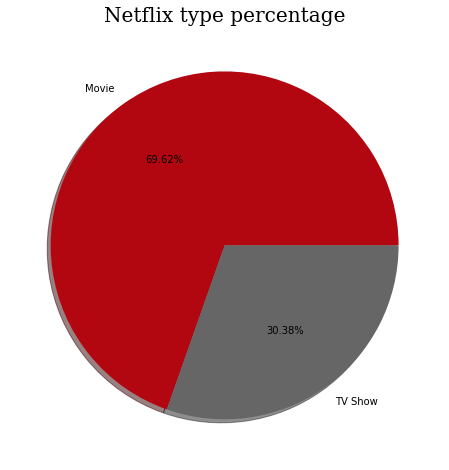

In [84]:
f,ax = plt.subplots(1,1,figsize = (8,8))
color_list = ['#b20710','#666666']
plt.pie(net['type'].value_counts(), labels = net['type'].unique(),colors = color_list,shadow = True,
       autopct='%0.2f%%');
plt.title ("Netflix type percentage",fontfamily='serif',fontsize = 20);


In [100]:
net_type_d = net.groupby(['type'])['director'].value_counts().reset_index(name = 'counts')
net_type_d_m = net_type_d[net_type_d['type'] == 'Movie'].head(5)
net_type_d_t = net_type_d[net_type_d['type'] == 'TV Show'].head(5)

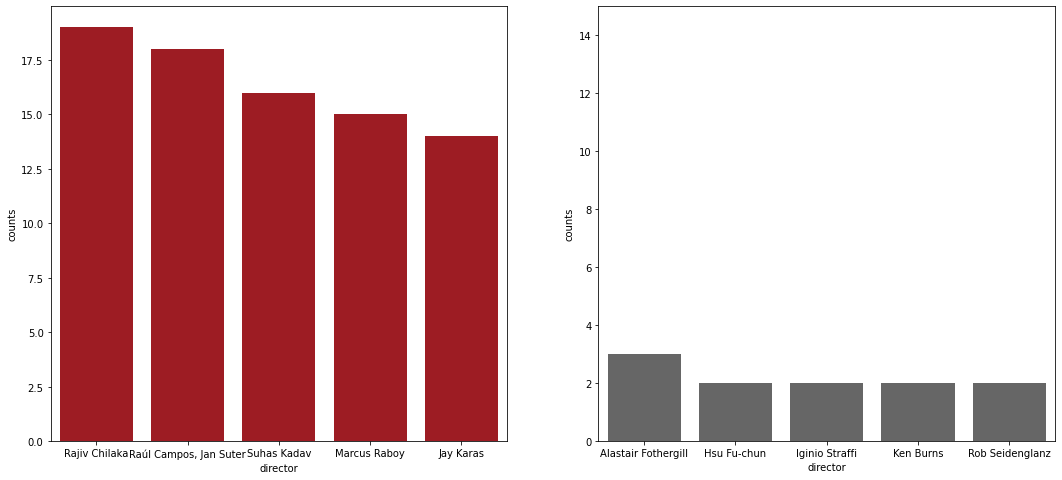

In [111]:
f,ax = plt.subplots(1,2 ,figsize = (18,8))
sns.barplot(data = net_type_d_m, x = 'director',y = 'counts', ax = ax[0],color = '#b20710')
sns.barplot(data = net_type_d_t, x = 'director',y = 'counts', ax = ax[1],color = '#666666')
plt.ylim([0,15]);

In [115]:
net_type_c = net.groupby(['type'])['country'].value_counts().reset_index(name = 'counts')
net_type_c_m = net_type_c[net_type_c['type'] == 'Movie'].head(5)
net_type_c_t = net_type_c[net_type_c['type'] == 'TV Show'].head(5)

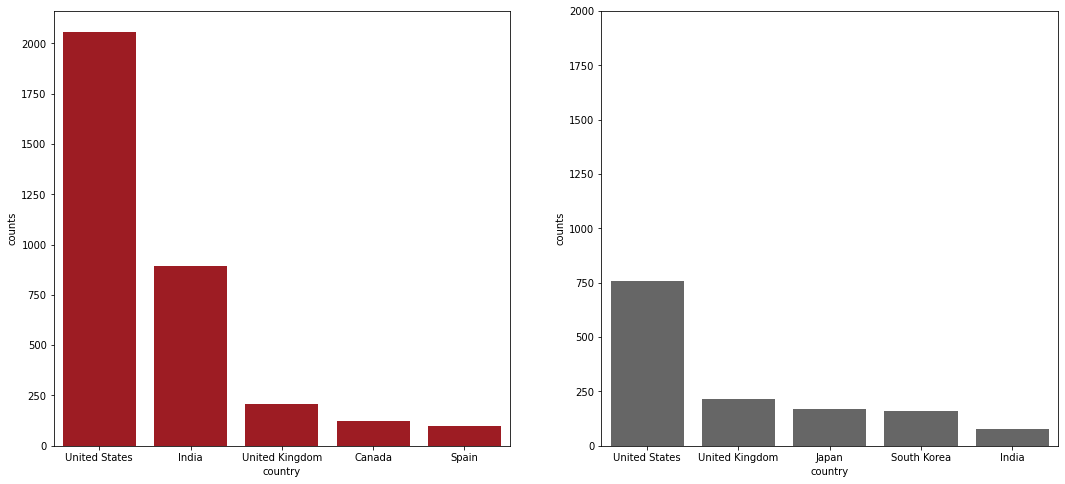

In [122]:
f,ax = plt.subplots(1,2 ,figsize = (18,8))
sns.barplot(data = net_type_c_m, x = 'country',y = 'counts', ax = ax[0],color = '#b20710')
sns.barplot(data = net_type_c_t, x = 'country',y = 'counts', ax = ax[1],color = '#666666')
plt.ylim([0,2000]);

In [129]:
net_type_dy = net.groupby(['type'])['date_added_year'].value_counts().reset_index(name = 'counts').sort_values(by = ['type','date_added_year'])

Text(0.5, 1.0, 'Year of release by type')

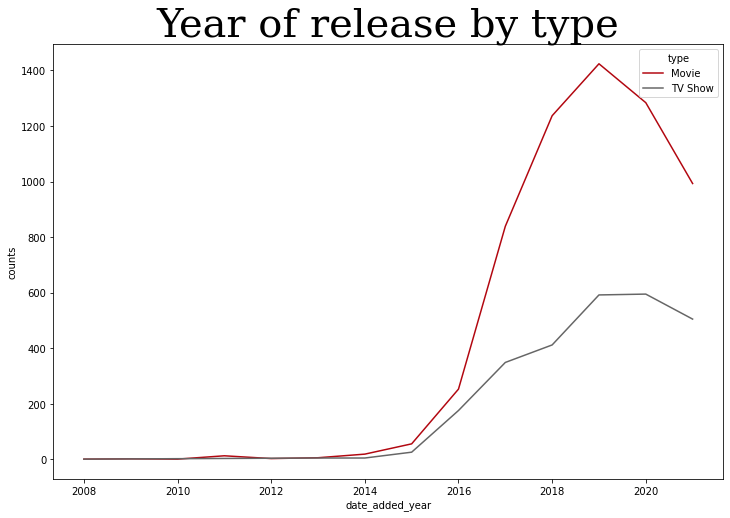

In [211]:
f,ax = plt.subplots(1,1 ,figsize = (12,8))
color_list = ['#b20710','#666666']
sns.lineplot(data = net_type_dy, x = 'date_added_year', y = 'counts',hue = 'type',palette = color_list)
plt.title("Year of release by type",fontfamily='serif',fontsize = 40)

In [155]:
net_type_r = net.groupby(['type'])['rate'].value_counts().reset_index(name = 'counts')
net_type_r_m = net_type_r[net_type_r['type'] == 'Movie'].head(5)
net_type_r_t = net_type_r[net_type_r['type'] == 'TV Show'].head(5)

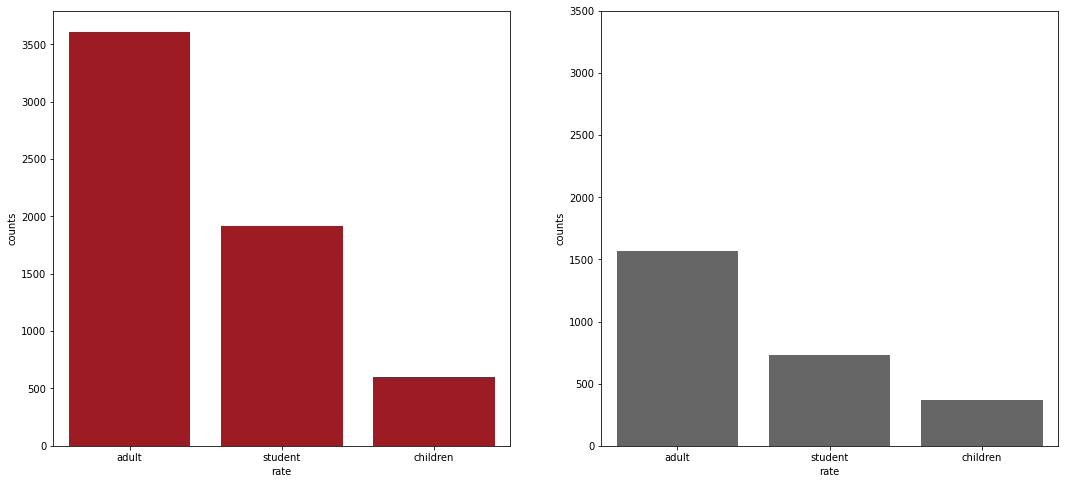

In [157]:
f,ax = plt.subplots(1,2 ,figsize = (18,8))
sns.barplot(data = net_type_r_m, x = 'rate',y = 'counts', ax = ax[0],color = '#b20710')
sns.barplot(data = net_type_r_t, x = 'rate',y = 'counts', ax = ax[1],color = '#666666')
plt.ylim([0,3500]);

In [246]:
net.groupby(['country'])['release_period'].mean().reset_index().sort_values(by = 'release_period',ascending = False)

,country,release_period
260,"India, Malaysia",57.0
685,"United States, Italy, United Kingdom, Liechten...",54.0
642,"United States, East Germany, West Germany",49.0
602,"United Kingdom, West Germany",46.0
395,"Poland,",44.0
...,...,...
615,"United States, Brazil, India, Uganda, China",0.0
616,"United States, Brazil, Japan, Spain, India",0.0
92,"Canada, United States, Ireland",-1.0
11,"Argentina, United States, Mexico",-1.0


In [303]:
a = net['director'].value_counts().head(5).index
b

,country
United States,2818
India,972
United Kingdom,419
Japan,245
South Korea,199


In [309]:
b = pd.DataFrame(net['country'].value_counts().head(5))
c = net.groupby(['country'])['rate'].value_counts().reset_index(name = 'counts')
d = c[(c['country'] == 'United States') | (c['country'] == 'India') | (c['country'] == 'United Kingdom') |
  (c['country'] == 'Japan') | (c['country'] == 'South Korea') ]
d

,country,rate,counts
307,India,student,554
308,India,adult,396
309,India,children,22
392,Japan,adult,128
393,Japan,student,94
394,Japan,children,23
539,South Korea,adult,105
540,South Korea,student,83
541,South Korea,children,11
623,United Kingdom,adult,313


<AxesSubplot: xlabel='country', ylabel='counts'>

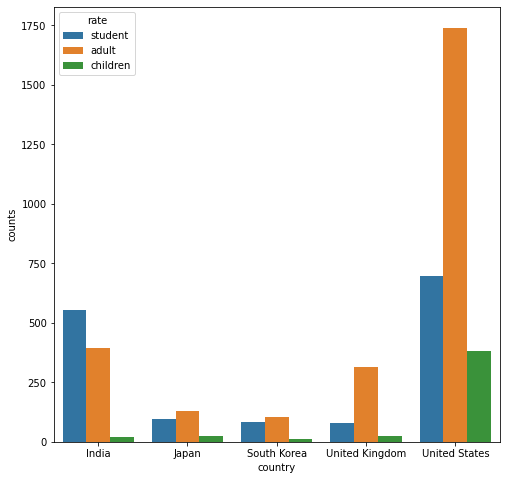

In [314]:
f,ax = plt.subplots(1,1,figsize =(8,8))
sns.barplot(data =d ,x = 'country',y = 'counts',hue = 'rate')

In [357]:
e = net.groupby(['country'])['release_period'].mean().reset_index(name = 'counts')
g = e[(e['country'] == 'United States') | (e['country'] == 'India') | (e['country'] == 'United Kingdom') |
  (e['country'] == 'Japan') | (e['country'] == 'South Korea') ]
e

,country,counts
0,", France, Algeria",7.000000
1,", South Korea",0.000000
2,Argentina,2.857143
3,"Argentina, Brazil, France, Poland, Germany, De...",1.000000
4,"Argentina, Chile",8.000000
...,...,...
743,Venezuela,0.000000
744,"Venezuela, Colombia",11.000000
745,Vietnam,1.428571
746,West Germany,40.000000


In [367]:
b.index.tolist()

['United States', 'India', 'United Kingdom', 'Japan', 'South Korea']

In [ ]:
net['date']

In [374]:
e[e['country'].isin(b.index)]

,country,counts
251,India,6.758230
319,Japan,4.721311
435,South Korea,1.698492
506,United Kingdom,3.160287
603,United States,5.466216


<AxesSubplot: xlabel='country', ylabel='counts'>

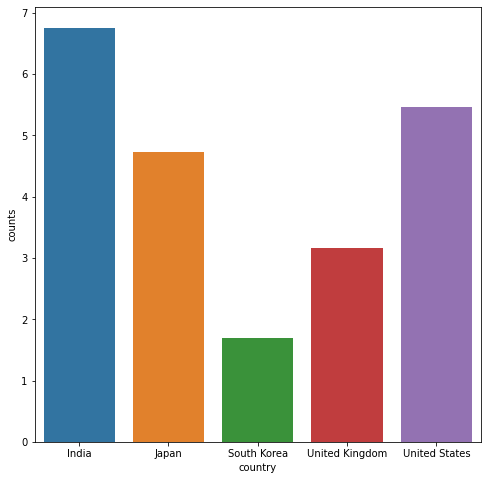

In [329]:
f,ax = plt.subplots(1,1,figsize =(8,8))
sns.barplot(data = g,x ='country', y = 'counts')

In [343]:
net.groupby(['type','rate'])['movie_duration'].mean()

type     rate    
Movie    adult        97.472999
         children     79.215589
         student     109.789776
TV Show  adult         0.000000
         children      0.000000
         student       0.000000
Name: movie_duration, dtype: float64

In [337]:
net['movie_duration'] = net['movie_duration'].fillna(0)

In [341]:
net['movie_duration'] = net['movie_duration'].astype(int)

In [ ]:
net=

ValueError: Could not interpret value `y` for parameter `x`

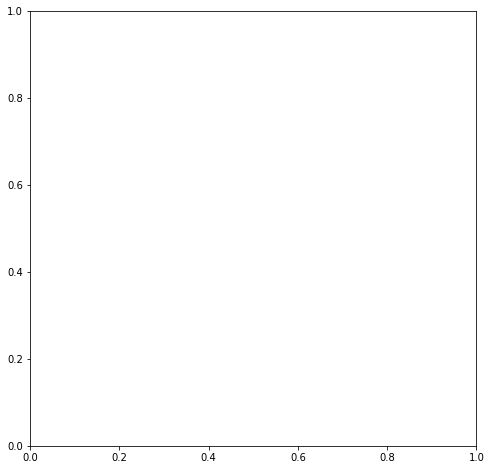

In [260]:
f,ax = plt.subplots(figsize = (8,8))

a = net[(net['director'] == 'Rajiv Chilaka')| (net['director'] == 'Raúl Campos, Jan Suter')|(net['director'] == 'Marcus Raboy')|(net['director'] == 'Suhas Kadavr')|(net['director'] == 'Jay Karas')]
sns.scatterplot(data = a, x = ),y = 'director')
sns.scatterplot(data = a, x = 'date_added_year',y = 'director')
plt.grid(True,axis = 'y')
#plt.text (1980,'Frank Capra','75',fontfamily='serif',fontsize = 20)

In [280]:
a = pd.DataFrame(net.groupby(['director'])['rate'].value_counts())

a_1 = a[a['rate'] >= 3]

In [282]:
a_1

rate
director                                           rate          
Abbas Alibhai Burmawalla, Mastan Alibhai Burmaw... student      3
Adam Shankman                                      children     3
Ahmad El-Badri                                     adult        3
Ahmed Al-Badry                                     student      3
Ahmed Nader Galal                                  student      3
...                                                           ...
Wilson Yip                                         adult        3
Youssef Chahine                                    adult        7
                                                   student      5
Yılmaz Erdoğan                                     adult        5
                                                   student      3

[259 rows x 1 columns]

In [252]:
net_type_d_m

,type,director,counts
0,Movie,Rajiv Chilaka,19
1,Movie,"Raúl Campos, Jan Suter",18
2,Movie,Suhas Kadav,16
3,Movie,Marcus Raboy,15
4,Movie,Jay Karas,14


In [206]:
net[net['director'] == 'Stuart Orme']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year,release period,movie_duration,rate,release_period
7112,s7113,TV Show,Jack Taylor,Stuart Orme,"Iain Glen, Killian Scott, Nora-Jane Noone, Tar...","United States, Ireland",2013-03-31,2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",Ken Bruen's bestselling crime novels leap to l...,2013.0,-3.0,NaN,adult,-3.0


In [188]:
for i in net_type_d_m['director'].tolist():
    globals()['net_{}'.format(i)] = net_dir_r[net_dir_r['director'] == i]


In [191]:
net_Rajiv_Chilaka

NameError: name 'net_Rajiv_Chilaka' is not defined

In [176]:
net_type_d_m['director'].tolist()

['Rajiv Chilaka',
 'Raúl Campos, Jan Suter',
 'Suhas Kadav',
 'Marcus Raboy',
 'Jay Karas']

In [185]:
net.loc[net['director'] == net_type_d_m['director']]

ValueError: Can only compare identically-labeled Series objects

In [379]:
print(net['date_added'].min())
print(net['date_added'].max())

2008-01-01 00:00:00
2021-09-25 00:00:00
